In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
beta_df = pd.read_csv(
    "GSE40279_average_beta\\GSE40279_average_beta.txt",
    sep="\t",
    index_col=0
)

In [4]:
beta_df.head()

,X1001,X1002,X1003,X1004,X1005,X1006,X1007,X1008,X1009,X1010,...,X11085,X11086,X11087,X11089,X11090,X11092,X11093,X11094,X11095,X11096
ID_REF,,,,,,,,,,,,,,,,,,,,,
cg13869341,0.849261,0.897434,0.751596,0.871313,0.775703,0.905383,0.809341,0.831056,0.785725,0.851040,...,0.872390,0.797936,0.813616,0.838759,0.845707,0.908023,0.800924,0.781394,0.844790,0.863501
cg14008030,0.505916,0.476842,0.487245,0.466692,0.490255,0.536831,0.513063,0.517671,0.526291,0.482147,...,0.609596,0.589514,0.550069,0.536344,0.573834,0.555264,0.578522,0.551470,0.570779,0.620469
cg12045430,0.072590,0.079020,0.089230,0.076666,0.079986,0.096142,0.084693,0.084978,0.076284,0.088784,...,0.074361,0.042380,0.047387,0.036802,0.025272,0.051956,0.063291,0.041310,0.059926,0.018954
cg20826792,0.186961,0.228201,0.237660,0.253624,0.220404,0.229790,0.221750,0.264803,0.198577,0.248889,...,0.187167,0.163056,0.187181,0.117650,0.122737,0.197111,0.223854,0.188288,0.129233,0.051887
cg00381604,0.036803,0.053161,0.045588,0.032824,0.035804,0.018335,0.046591,0.045572,0.049980,0.046218,...,0.011383,0.004570,0.014957,0.012622,0.015449,0.041821,0.038828,0.022204,0.013555,0.000000


In [12]:
beta_df.shape

(473034, 656)

In [6]:
import re

def load_metadata(filepath):
    sample_ids = []
    raw_metadata = []

    with open(filepath, 'r') as f:
        for line in f:
            if line.startswith("!Sample_geo_accession"):
                sample_ids = line.strip().split('\t')[1:]
            elif line.startswith("!Sample_characteristics_ch1"):
                raw_metadata.append(line.strip().split('\t')[1:])

    # Initialize dictionary
    metadata_dict = {sample: {} for sample in sample_ids}

    for meta_row in raw_metadata:
        for idx, cell in enumerate(meta_row):
            if ':' in cell:
                key, value = cell.split(':', 1)
                key = key.strip().lower()
                value = value.strip().strip('"')
                metadata_dict[sample_ids[idx]][key] = value

    meta_df = pd.DataFrame.from_dict(metadata_dict, orient='index')
    meta_df.index.name = 'SampleID'
    return meta_df

# Usage
file_path = "GSE40279_series_matrix/GSE40279_series_matrix.txt"
metadata_df = load_metadata(file_path)
metadata_df.columns = metadata_df.columns.str.strip().str.replace('"', '').str.strip()
metadata_df.rename(columns={'age (y)': 'age_years'}, inplace=True)
metadata_df['age_years'] = pd.to_numeric(metadata_df['age_years'], errors='coerce')

In [7]:
metadata_df.head()

,age_years,source,plate,gender,ethnicity,tissue
SampleID,,,,,,
"""GSM989827""",67,UCSD,1,F,Caucasian - European,whole blood
"""GSM989828""",89,UCSD,1,F,Caucasian - European,whole blood
"""GSM989829""",66,UCSD,1,F,Caucasian - European,whole blood
"""GSM989830""",64,UCSD,1,F,Caucasian - European,whole blood
"""GSM989831""",62,UCSD,1,F,Caucasian - European,whole blood


In [11]:
metadata_df.shape

(656, 6)

In [15]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 656 entries, "GSM989827" to "GSM990627"
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age_years  656 non-null    int64 
 1   source     656 non-null    object
 2   plate      656 non-null    object
 3   gender     656 non-null    object
 4   ethnicity  656 non-null    object
 5   tissue     656 non-null    object
dtypes: int64(1), object(5)
memory usage: 52.0+ KB


In [8]:
beta_df.columns = metadata_df.index
beta_df_T = beta_df.T
beta_df_T.index.name = 'SampleID'
merged_df = beta_df_T.join(metadata_df, how='inner')



In [9]:
merged_df.head()

,cg13869341,cg14008030,cg12045430,cg20826792,cg00381604,cg20253340,cg21870274,cg03130891,cg24335620,cg16162899,...,cg06996138,cg16817496,cg07660283,cg09226288,age_years,source,plate,gender,ethnicity,tissue
SampleID,,,,,,,,,,,,,,,,,,,,,
"""GSM989827""",0.849261,0.505916,0.072590,0.186961,0.036803,0.661391,0.777891,0.119538,0.782193,0.905126,...,0.021236,0.291702,0.727581,0.705499,67,UCSD,1,F,Caucasian - European,whole blood
"""GSM989828""",0.897434,0.476842,0.079020,0.228201,0.053161,0.545065,0.776407,0.063938,0.787890,0.913628,...,0.019314,0.232008,0.693993,0.716328,89,UCSD,1,F,Caucasian - European,whole blood
"""GSM989829""",0.751596,0.487245,0.089230,0.237660,0.045588,0.560305,0.774234,0.113279,0.788896,0.914348,...,0.016854,0.296456,0.703291,0.703523,66,UCSD,1,F,Caucasian - European,whole blood
"""GSM989830""",0.871313,0.466692,0.076666,0.253624,0.032824,0.509904,0.772503,0.067163,0.800081,0.882308,...,0.019278,0.270818,0.751772,0.696888,64,UCSD,1,F,Caucasian - European,whole blood
"""GSM989831""",0.775703,0.490255,0.079986,0.220404,0.035804,0.549847,0.730345,0.131637,0.759171,0.902783,...,0.016097,0.236963,0.746697,0.693056,62,UCSD,1,F,Caucasian - European,whole blood


In [13]:
merged_df.shape

(656, 473040)

In [36]:
merged_df.to_parquet('merged.parquet', index=True)

NameError: name 'df_merged' is not defined

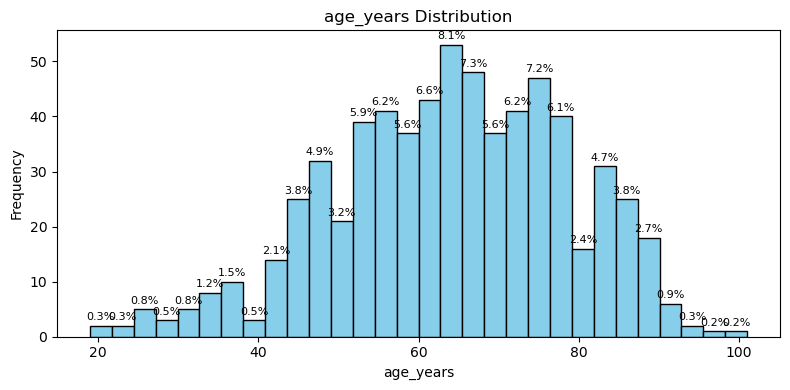

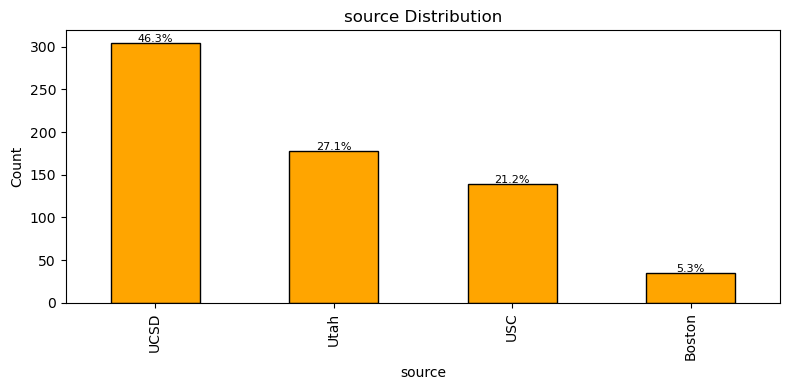

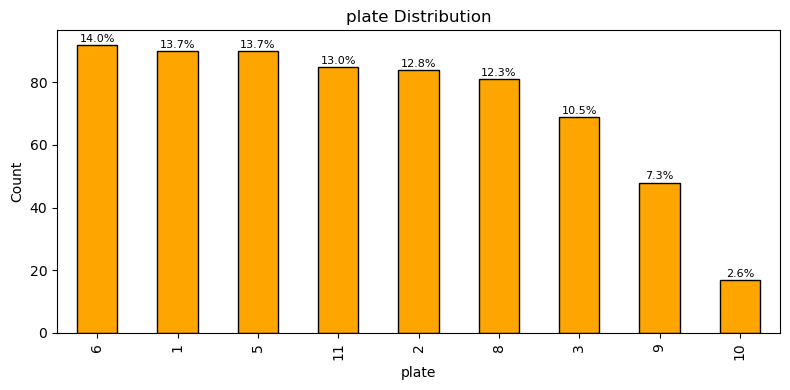

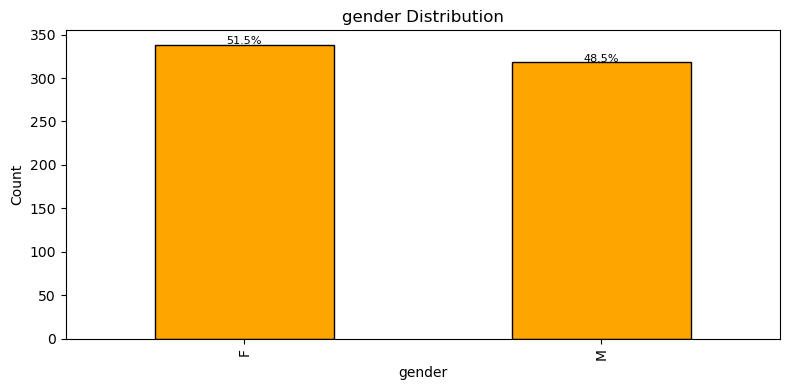

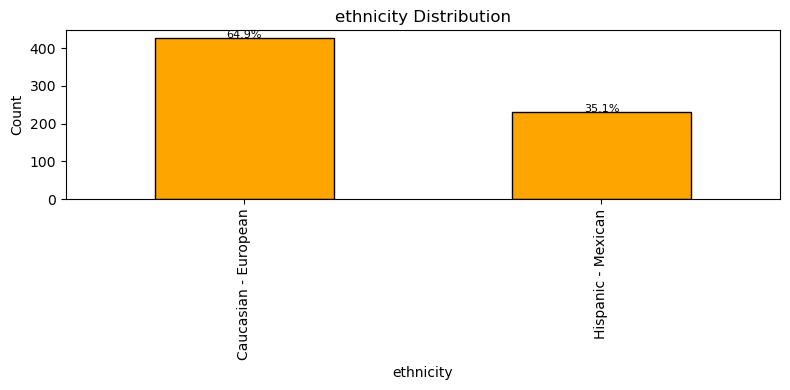

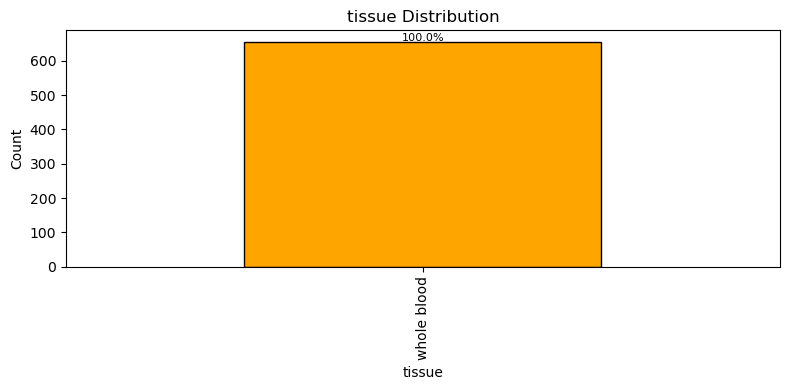

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Features to plot
features = ['age_years', 'source', 'plate', 'gender', 'ethnicity', 'tissue']

for feature in features:
    if feature in merged_df.columns:
        plt.figure(figsize=(8, 4))
        
        if pd.api.types.is_numeric_dtype(merged_df[feature]):
            # Numeric column: Histogram with percentage labels
            counts, bins, patches = plt.hist(
                merged_df[feature].dropna(), bins=30,
                color='skyblue', edgecolor='black'
            )
            
            total = counts.sum()
            for count, patch in zip(counts, patches):
                height = patch.get_height()
                if height > 0:
                    plt.text(
                        patch.get_x() + patch.get_width() / 2,
                        height + 1,
                        f"{(count / total) * 100:.1f}%",
                        ha='center', fontsize=8
                    )
            
            plt.title(f"{feature} Distribution")
            plt.xlabel(feature)
            plt.ylabel("Frequency")

        else:
            # Categorical column: Bar chart with percentages
            value_counts = merged_df[feature].value_counts(dropna=False)
            total = value_counts.sum()
            ax = value_counts.plot(kind='bar', color='orange', edgecolor='black')

            for i, (idx, count) in enumerate(value_counts.items()):
                percent = (count / total) * 100
                ax.text(i, count + 1, f"{percent:.1f}%", ha='center', fontsize=8)

            plt.title(f"{feature} Distribution")
            plt.xlabel(feature)
            plt.ylabel("Count")

        plt.tight_layout()
        plt.show()
    else:
        print(f"⚠️ Column '{feature}' not found in merged_df")


In [ ]:
With plate feature I can look for batch defects

In [18]:
merged_df.drop(columns=['tissue'], inplace=True)


In [20]:
import pandas as pd

# Get numeric columns only, excluding 'age_years'
numeric_cols = merged_df.select_dtypes(include='number').columns.drop('age_years')

# Calculate correlation with 'age_years' one column at a time
correlations = {}
for col in numeric_cols:
    corr_val = merged_df['age_years'].corr(merged_df[col])
    if pd.notnull(corr_val):  # Exclude NaNs
        correlations[col] = corr_val

# Convert to Series
correlation_series = pd.Series(correlations)

# Filter by |correlation| ≥ 0.5
strong_corr = correlation_series[correlation_series.abs() >= 0.5]

# Print result
print(f"Number of columns strongly correlated with age_years (|r| ≥ 0.5): {len(strong_corr)}")


Number of columns strongly correlated with age_years (|r| ≥ 0.5): 405


In [23]:
strong_corr.index

Index(['cg13856810', 'cg06060874', 'cg03126058', 'cg19560758', 'cg04908588',
       'cg20822990', 'cg01713950', 'cg22512670', 'cg25410668', 'cg12667125',
       ...
       'cg19702785', 'cg07547549', 'cg00387658', 'cg03224418', 'cg00636737',
       'cg05156137', 'cg02316713', 'cg26921612', 'cg18448426', 'cg08415592'],
      dtype='object', length=405)

In [25]:
# Start with the strongly correlated features
features_to_keep = list(strong_corr.index)

# Ensure 'age_years' is included
if 'age_years' not in features_to_keep:
    features_to_keep.append('age_years')

# Add additional important columns
additional_features = ['source', 'plate', 'gender', 'ethnicity', 'tissue']
for col in additional_features:
    if col in merged_df.columns and col not in features_to_keep:
        features_to_keep.append(col)

# Subset the DataFrame
reduced_df = merged_df[features_to_keep].copy()


In [26]:
reduced_df

,cg13856810,cg06060874,cg03126058,cg19560758,cg04908588,cg20822990,cg01713950,cg22512670,cg25410668,cg12667125,...,cg05156137,cg02316713,cg26921612,cg18448426,cg08415592,age_years,source,plate,gender,ethnicity
SampleID,,,,,,,,,,,,,,,,,,,,,
"""GSM989827""",0.680305,0.592443,0.744047,0.237876,0.258552,0.306689,0.666278,0.520373,0.555612,0.583663,...,0.337838,0.317046,0.364555,0.759486,0.214572,67,UCSD,1,F,Caucasian - European
"""GSM989828""",0.608048,0.413230,0.644831,0.246561,0.191942,0.259752,0.616672,0.450366,0.580080,0.545516,...,0.269273,0.260636,0.320464,0.634557,0.146146,89,UCSD,1,F,Caucasian - European
"""GSM989829""",0.654993,0.566854,0.744626,0.267622,0.217094,0.332134,0.679804,0.526571,0.527759,0.641327,...,0.303068,0.333736,0.366828,0.730716,0.212962,66,UCSD,1,F,Caucasian - European
"""GSM989830""",0.677207,0.728849,0.827048,0.238636,0.246347,0.314241,0.668149,0.518035,0.593645,0.582638,...,0.298308,0.300084,0.354694,0.743130,0.226311,64,UCSD,1,F,Caucasian - European
"""GSM989831""",0.715584,0.527600,0.807100,0.215846,0.273770,0.305581,0.689499,0.522688,0.542025,0.654740,...,0.232456,0.332636,0.363529,0.735887,0.284690,62,UCSD,1,F,Caucasian - European
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""GSM990623""",0.782445,0.560507,0.769555,0.253480,0.203636,0.331323,0.666806,0.542460,0.607787,0.670303,...,0.324512,0.388677,0.435747,0.734483,0.266028,78,UCSD,11,F,Caucasian - European
"""GSM990624""",0.776959,0.533467,0.711826,0.249375,0.257970,0.297315,0.685472,0.467330,0.580290,0.635507,...,0.314123,0.325383,0.407967,0.747930,0.237072,71,UCSD,11,M,Caucasian - European
"""GSM990625""",0.622078,0.518451,0.647783,0.280944,0.168862,0.316008,0.662113,0.468311,0.599738,0.597345,...,0.210413,0.291059,0.359972,0.671134,0.141066,68,UCSD,11,M,Caucasian - European


In [30]:
reduced_df.shape

(656, 410)

In [33]:
reduced_df.to_parquet('reduced.parquet', index=True)

In [41]:
from sklearn.model_selection import train_test_split

columns_to_drop = ['age_years', 'source', 'plate', 'gender', 'ethnicity']
x = reduced_df.drop(columns=columns_to_drop)
y = reduced_df['age_years']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, r2_score

enet = ElasticNetCV(cv=5, random_state=42)
enet.fit(x_train, y_train)
y_pred_enet = enet.predict(x_test)

print("ElasticNet MAE:", mean_absolute_error(y_test, y_pred_enet))
print("ElasticNet R2:", r2_score(y_test, y_pred_enet))


ElasticNet MAE: 4.0342803262299824
ElasticNet R2: 0.8826037927847613


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.178e+03, tolerance: 1.082e+01
  model = cd_fast.enet_coordinate_descent(


In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("RF MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RF R2:", r2_score(y_test, y_pred_rf))


RF MAE: 4.862424242424243
RF R2: 0.8466436487799828


In [88]:
print("RF MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RF R2:", r2_score(y_test, y_pred_rf))

RF MAE: 4.862424242424243
RF R2: 0.8466436487799828


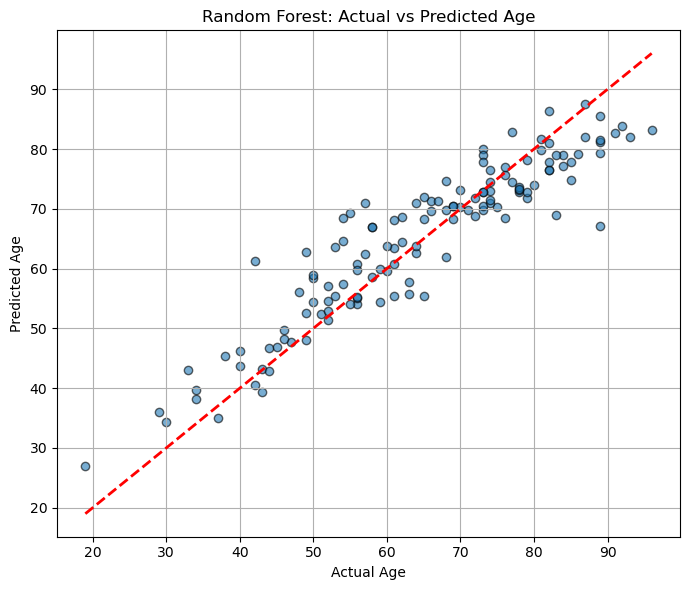

In [57]:
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Random Forest: Actual vs Predicted Age')
plt.grid(True)
plt.tight_layout()
plt.show()

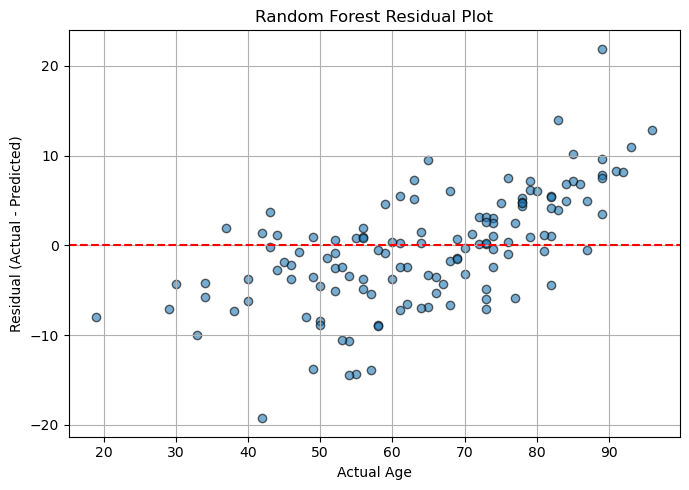

In [58]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(7, 5))
plt.scatter(y_test, residuals, alpha=0.6, edgecolors='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Age')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Random Forest Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 4.86
RMSE: 6.28
R² Score: 0.85


In [51]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

print("XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("XGBoost R2:", r2_score(y_test, y_pred_xgb))


XGBoost MAE: 4.921728134155273
XGBoost R2: 0.8471335768699646


In [52]:
rf_importance = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
xgb_importance = pd.Series(xgb.feature_importances_, index=x_train.columns).sort_values(ascending=False)


cg16867657    0.683200
cg10501210    0.032405
cg14361627    0.018857
cg22454769    0.013454
cg06639320    0.011990
                ...   
cg12939283    0.000094
cg04999352    0.000085
cg24883498    0.000084
cg06445343    0.000084
cg02170478    0.000060
Length: 405, dtype: float64

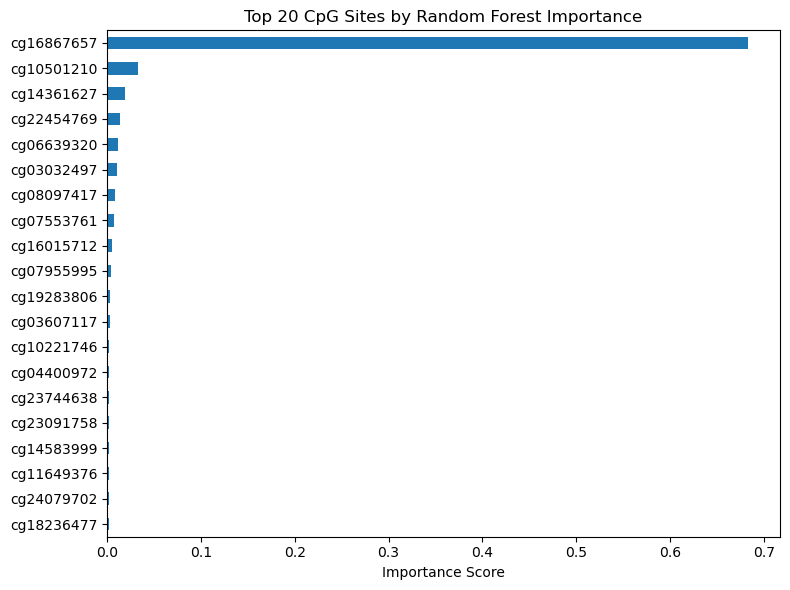

In [54]:
rf_importance.head(20).plot(kind='barh', figsize=(8,6), title='Top 20 CpG Sites by Random Forest Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


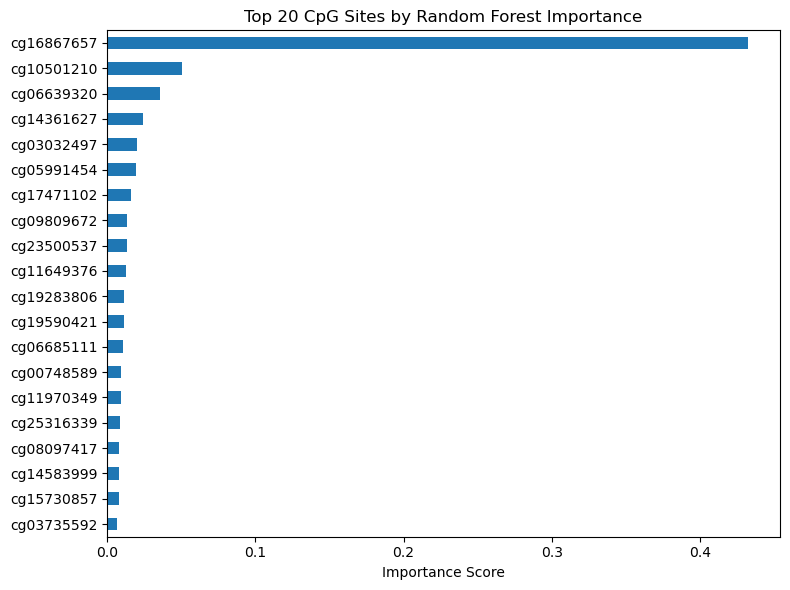

In [60]:
xgb_importance.head(20).plot(kind='barh', figsize=(8,6), title='Top 20 CpG Sites by Random Forest Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [61]:
from sklearn.linear_model import ElasticNetCV

ElasticNet MAE: 4.05
ElasticNet R² Score: 0.88


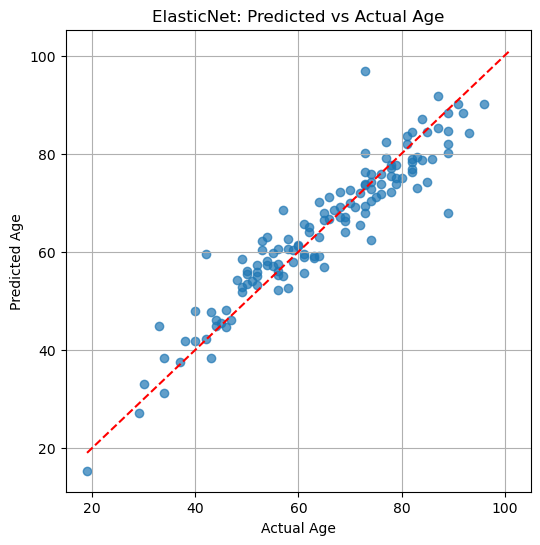

In [62]:
enet = ElasticNetCV(cv=5, random_state=42, l1_ratio=[.1, .5, .7, .9, .95, .99, 1], max_iter=10000)
enet.fit(x_train, y_train)

# Predict
y_pred = enet.predict(x_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"ElasticNet MAE: {mae:.2f}")
print(f"ElasticNet R² Score: {r2:.2f}")

# Optional: plot predicted vs actual age
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('ElasticNet: Predicted vs Actual Age')
plt.grid(True)
plt.show()


In [ ]:
print(f"ElasticNet MAE: {mae:.2f}")
print(f"ElasticNet R² Score: {r2:.2f}")

results_df = results_df.append({'Dataset': 'Female',
                                'MAE': mae,
                                'R2': r2}, ignore_index=True)

# Display the final DataFrame
print(results_df)


In [67]:
merged_df['gender']

SampleID
"GSM989827"    F
"GSM989828"    F
"GSM989829"    F
"GSM989830"    F
"GSM989831"    F
              ..
"GSM990623"    F
"GSM990624"    M
"GSM990625"    M
"GSM990626"    F
"GSM990627"    M
Name: gender, Length: 656, dtype: object

In [70]:
df_male = reduced_df[merged_df['gender']== 'M']
df_female = reduced_df[merged_df['gender']== 'F']

In [71]:
df_male.shape

(318, 410)

In [74]:
columns_to_drop = ['age_years', 'source', 'plate', 'gender', 'ethnicity']
x1 = df_male.drop(columns=columns_to_drop)
y1 = df_male['age_years']

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [ ]:
columns_to_drop = ['age_years', 'source', 'plate', 'gender', 'ethnicity']
x2 = df_female.drop(columns=columns_to_drop)
y2 = df_female['age_years']

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [77]:
df_male = merged_df[merged_df['gender']== 'M']
df_female = merged_df[merged_df['gender']== 'F']

# Male

In [80]:
# Get numeric columns only, excluding 'age_years'
numeric_cols = df_male.select_dtypes(include='number').columns.drop('age_years')

# Calculate correlation with 'age_years' one column at a time
correlations = {}
for col in numeric_cols:
    corr_val = df_male['age_years'].corr(df_male[col])
    if pd.notnull(corr_val):  # Exclude NaNs
        correlations[col] = corr_val

# Convert to Series
correlation_series = pd.Series(correlations)

# Filter by |correlation| ≥ 0.5
strong_corr = correlation_series[correlation_series.abs() >= 0.5]

# Print result
print(f"Number of columns strongly correlated with age_years (|r| ≥ 0.5): {len(strong_corr)}")


Number of columns strongly correlated with age_years (|r| ≥ 0.5): 526


In [82]:
# Start with the strongly correlated features
features_to_keep = list(strong_corr.index)

# Ensure 'age_years' is included
if 'age_years' not in features_to_keep:
    features_to_keep.append('age_years')

# Add additional important columns
additional_features = ['source', 'plate', 'gender', 'ethnicity', 'tissue']
for col in additional_features:
    if col in df_male.columns and col not in features_to_keep:
        features_to_keep.append(col)

# Subset the DataFrame
male_reduced = df_male[features_to_keep].copy()


In [83]:
male_reduced.shape

(318, 531)

# Female

In [84]:
# Get numeric columns only, excluding 'age_years'
numeric_cols_female = df_female.select_dtypes(include='number').columns.drop('age_years')

# Calculate correlation with 'age_years' one column at a time
correlations_female = {}
for col in numeric_cols_female:
    corr_val = df_female['age_years'].corr(df_female[col])
    if pd.notnull(corr_val):  # Exclude NaNs
        correlations_female[col] = corr_val

# Convert to Series
correlation_series_female = pd.Series(correlations_female)

# Filter by |correlation| ≥ 0.5
strong_corr_female = correlation_series_female[correlation_series_female.abs() >= 0.5]

# Print result
print(f"Number of columns strongly correlated with age_years in females (|r| ≥ 0.5): {len(strong_corr_female)}")

Number of columns strongly correlated with age_years in females (|r| ≥ 0.5): 409


In [85]:
# Start with the strongly correlated features
features_to_keep_female = list(strong_corr_female.index)

# Ensure 'age_years' is included
if 'age_years' not in features_to_keep_female:
    features_to_keep_female.append('age_years')

# Add additional important columns
additional_features = ['source', 'plate', 'gender', 'ethnicity', 'tissue']
for col in additional_features:
    if col in df_female.columns and col not in features_to_keep_female:
        features_to_keep_female.append(col)

# Subset the DataFrame
female_reduced = df_female[features_to_keep_female].copy()

In [87]:
# Get sets of column names
male_cols = set(male_reduced.columns)
female_cols = set(female_reduced.columns)

# Features only in male_reduced
uncommon_in_male = male_cols - female_cols

# Features only in female_reduced
uncommon_in_female = female_cols - male_cols

# Print results
print("Features only in male_reduced:")
print(len(uncommon_in_male),uncommon_in_male)

print("\nFeatures only in female_reduced:")
print(len(uncommon_in_female),uncommon_in_female)


Features only in male_reduced:
228 {'cg06526721', 'cg09927651', 'cg14042143', 'cg16003790', 'cg18018313', 'cg14775286', 'cg05379350', 'cg07955995', 'cg21990700', 'cg13954457', 'cg16682903', 'cg19335412', 'cg22929506', 'cg00417323', 'cg01329789', 'cg13021857', 'cg08888956', 'cg14556683', 'cg20964856', 'cg18406708', 'cg07233483', 'cg04826368', 'cg22112832', 'cg02286081', 'cg20303331', 'cg19500607', 'cg23606718', 'cg14837598', 'cg01074797', 'cg05619598', 'cg27193080', 'cg10107473', 'cg05934592', 'cg22213242', 'cg10772169', 'cg19401340', 'cg04976151', 'cg14532755', 'cg07806886', 'cg00308841', 'cg16695548', 'cg02046143', 'cg16541026', 'cg24217948', 'cg05042708', 'cg10476085', 'cg00103778', 'cg01820962', 'cg01747664', 'cg17372101', 'cg23913963', 'cg00876267', 'cg22990198', 'cg24868150', 'cg05157098', 'cg12667125', 'cg07927379', 'cg26969888', 'cg01282174', 'cg12920180', 'cg06544310', 'cg14819891', 'cg06567855', 'cg06335143', 'cg17321954', 'cg07158339', 'cg19784428', 'cg26543112', 'cg14188401'

ElasticNet MAE: 3.02
ElasticNet R² Score: 0.94


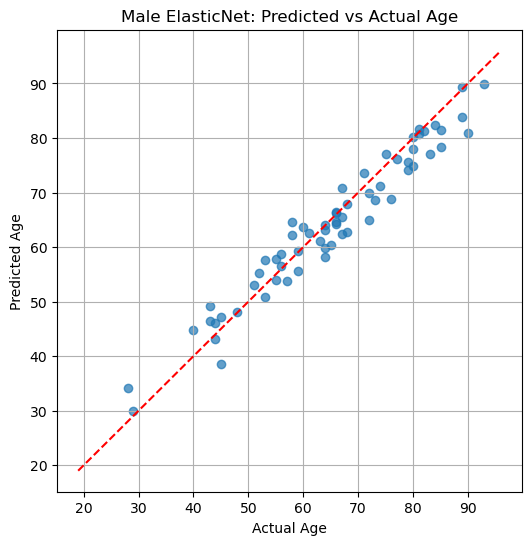

In [110]:
# Assume male_reduced and male_age are your data and target
columns_to_drop = ['age_years', 'source', 'plate', 'gender', 'ethnicity']
x = male_reduced.drop(columns=columns_to_drop)
y = male_reduced['age_years']

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# ElasticNetCV model
enet = ElasticNetCV(
    cv=5,
    random_state=42,
    l1_ratio=[.1, .5, .7, .9, .95, .99, 1],
    max_iter=10000
)
enet.fit(x_train, y_train)

# Predict
y_pred = enet.predict(x_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"ElasticNet MAE: {mae:.2f}")
print(f"ElasticNet R² Score: {r2:.2f}")

# Plot predicted vs actual age
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('ElasticNet: Predicted vs Actual Age')
plt.grid(True)
plt.show()


# This should be final


In [126]:
#This should be final

# === Helper function to train model and extract coefficients ===
def train_and_get_top20_coefs(df, gender_label):
    columns_to_drop = ['age_years', 'source', 'plate', 'gender', 'ethnicity']
    X = df.drop(columns=columns_to_drop)
    y = df['age_years']

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Train ElasticNetCV
    model = ElasticNetCV(
        cv=5,
        random_state=42,
        l1_ratio=[.1, .5, .7, .9, .95, .99, 1],
        max_iter=10000
    )
    model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{gender_label} ElasticNet MAE: {mae:.2f}")
    print(f"{gender_label} ElasticNet R² Score: {r2:.2f}")

    # Plot actual vs predicted
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel('Actual Age')
    plt.ylabel('Predicted Age')
    plt.title(f'{gender_label} ElasticNet: Predicted vs Actual Age')
    plt.grid(True)
    plt.show()

    # Get feature names and coefficients
    feature_names = X_train.columns
    coefs = model.coef_

    # Create dataframe of features and coefficients
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        f'{gender_label}_Coefficient': coefs
    })

    # Add absolute coefficient for importance
    coef_df[f'Abs_{gender_label}_Coefficient'] = coef_df[f'{gender_label}_Coefficient'].abs()

    # Get top 20
    top20 = coef_df.sort_values(by=f'Abs_{gender_label}_Coefficient', ascending=False).head(20)
    top20 = top20[['Feature', f'{gender_label}_Coefficient']].reset_index(drop=True)

    return top20


Male ElasticNet MAE: 3.02
Male ElasticNet R² Score: 0.94


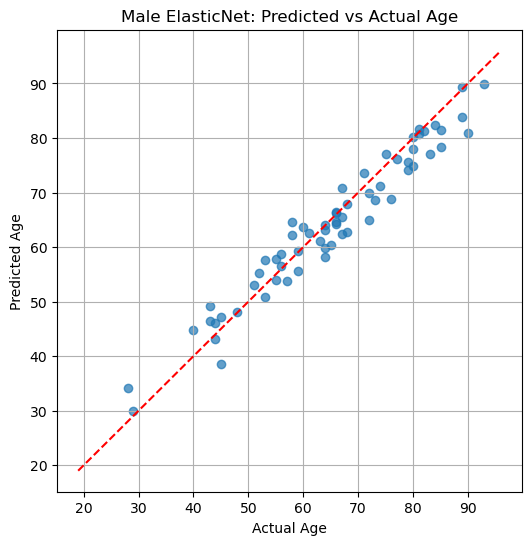


Female ElasticNet MAE: 3.83
Female ElasticNet R² Score: 0.83


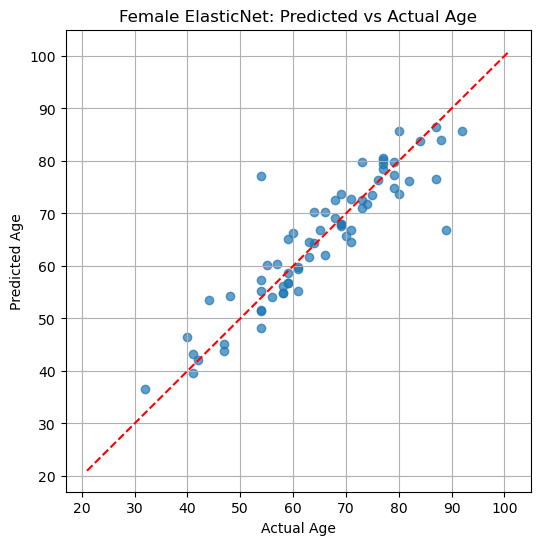


Top 20 Male & Female Features (by absolute coefficient):
     Male_Feature  Male_Coefficient Female_Feature  Female_Coefficient
Rank                                                                  
1      cg16867657         11.895383     cg16867657           13.983553
2      cg14361627          9.563304     cg11847992          -10.584663
3      cg04826368          8.956538     cg14361627            9.137636
4      cg10501210         -8.821103     cg25410668            8.867029
5      cg04875128          8.537240     cg22016779           -8.191081
6      cg08097417          7.810729     cg10501210           -8.184267
7      cg14209784         -7.763042     cg04738109            7.402233
8      cg01820962         -7.704424     cg18933331           -7.112302
9      cg18738190          7.599086     cg00573770           -7.024673
10     cg14692377          7.426877     cg22454769            6.811965
11     cg18473521          7.195265     cg20426994            6.791409
12     cg17110586  

In [127]:
# === Run for male and female ===
top20_male = train_and_get_top20_coefs(male_reduced, "Male")
top20_male.columns = ['Male_Feature', 'Male_Coefficient']

top20_female = train_and_get_top20_coefs(female_reduced, "Female")
top20_female.columns = ['Female_Feature', 'Female_Coefficient']

# === Combine into single DataFrame side-by-side ===
top20_combined = pd.concat([top20_male, top20_female], axis=1)
top20_combined.index = top20_combined.index + 1
top20_combined.index.name = 'Rank'

# === Display final combined table ===
print("\nTop 20 Male & Female Features (by absolute coefficient):")
print(top20_combined)

# === Optional: Save to CSV ===
# top20_combined.to_csv('top20_male_female_features.csv', index=True)


In [136]:
top20_combined

,Male_Feature,Male_Coefficient,Female_Feature,Female_Coefficient
Rank,,,,
1,cg16867657,11.895383,cg16867657,13.983553
2,cg14361627,9.563304,cg11847992,-10.584663
3,cg04826368,8.956538,cg14361627,9.137636
4,cg10501210,-8.821103,cg25410668,8.867029
5,cg04875128,8.537240,cg22016779,-8.191081
6,cg08097417,7.810729,cg10501210,-8.184267
7,cg14209784,-7.763042,cg04738109,7.402233
8,cg01820962,-7.704424,cg18933331,-7.112302
9,cg18738190,7.599086,cg00573770,-7.024673


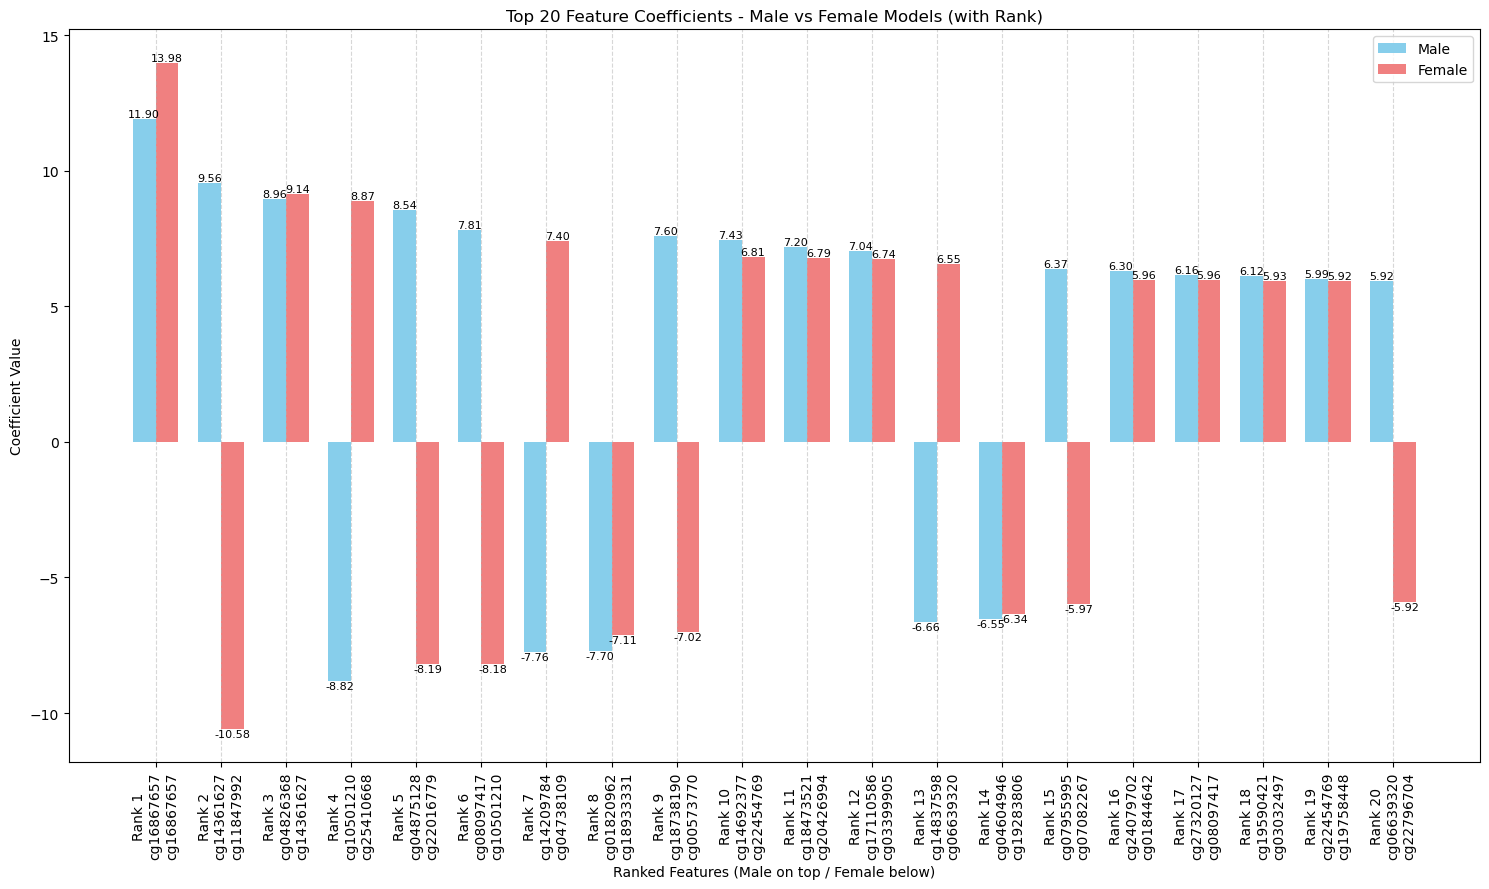

In [134]:
# Create x positions
x = np.arange(len(top20_combined))
width = 0.35

plt.figure(figsize=(15, 9))

# Plot bars
bars_male = plt.bar(x - width/2, top20_combined['Male_Coefficient'], width, label='Male', color='skyblue')
bars_female = plt.bar(x + width/2, top20_combined['Female_Coefficient'], width, label='Female', color='lightcoral')

# Custom x-tick labels: Rank + Male + Female
xtick_labels = [
    f"Rank {i+1}\n{m_feat}\n{f_feat}"
    for i, (m_feat, f_feat) in enumerate(zip(top20_combined['Male_Feature'], top20_combined['Female_Feature']))
]
plt.xticks(x, xtick_labels, rotation=90)

# Add value labels on each bar
for bar in bars_male:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval,
             f'{yval:.2f}', ha='center', va='bottom' if yval >= 0 else 'top', fontsize=8)

for bar in bars_female:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval,
             f'{yval:.2f}', ha='center', va='bottom' if yval >= 0 else 'top', fontsize=8)
plt.grid(axis='x', linestyle='--', alpha=0.5)
# Labels and formatting
plt.xlabel('Ranked Features (Male on top / Female below)')
plt.ylabel('Coefficient Value')
plt.title('Top 20 Feature Coefficients - Male vs Female Models (with Rank)')
plt.legend()
plt.tight_layout()
plt.show()


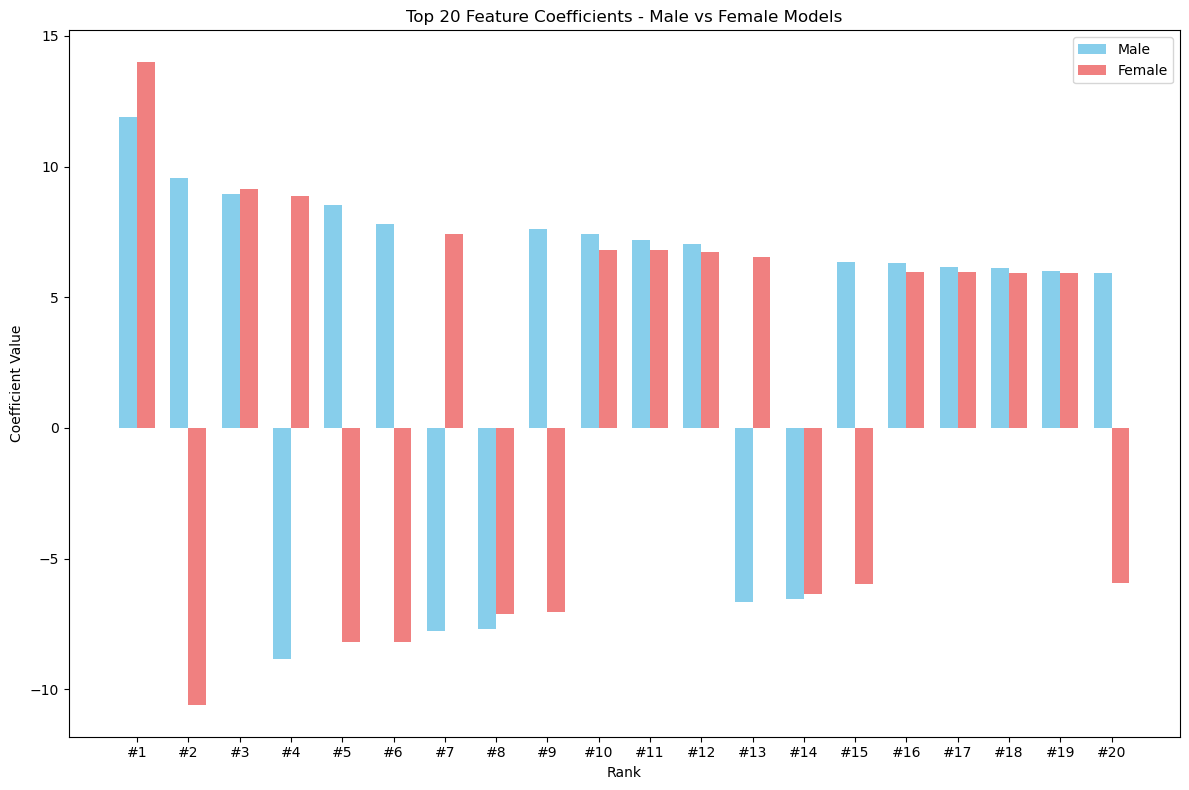

In [129]:
# Create x positions
x = np.arange(len(top20_combined))  # 0 to 19
width = 0.35

plt.figure(figsize=(12, 8))

# Bar plot for Male coefficients
plt.bar(x - width/2, top20_combined['Male_Coefficient'], width, label='Male', color='skyblue')

# Bar plot for Female coefficients
plt.bar(x + width/2, top20_combined['Female_Coefficient'], width, label='Female', color='lightcoral')

# X-axis ticks (Rank 1 to 20)
plt.xticks(x, [f'#{i+1}' for i in x], rotation=0)
plt.xlabel('Rank')
plt.ylabel('Coefficient Value')
plt.title('Top 20 Feature Coefficients - Male vs Female Models')
plt.legend()
plt.tight_layout()
plt.show()

In [141]:
new=merged_df

In [142]:
new.shape

(656, 473039)

In [145]:
new.head()

,cg13869341,cg14008030,cg12045430,cg20826792,cg00381604,cg20253340,cg21870274,cg03130891,cg24335620,cg16162899,...,cg22662321,cg06996138,cg16817496,cg07660283,cg09226288,age_years,source,plate,gender,ethnicity
SampleID,,,,,,,,,,,,,,,,,,,,,
"""GSM989827""",0.849261,0.505916,0.072590,0.186961,0.036803,0.661391,0.777891,0.119538,0.782193,0.905126,...,0.044135,0.021236,0.291702,0.727581,0.705499,67,UCSD,1,F,Caucasian - European
"""GSM989828""",0.897434,0.476842,0.079020,0.228201,0.053161,0.545065,0.776407,0.063938,0.787890,0.913628,...,0.058587,0.019314,0.232008,0.693993,0.716328,89,UCSD,1,F,Caucasian - European
"""GSM989829""",0.751596,0.487245,0.089230,0.237660,0.045588,0.560305,0.774234,0.113279,0.788896,0.914348,...,0.058990,0.016854,0.296456,0.703291,0.703523,66,UCSD,1,F,Caucasian - European
"""GSM989830""",0.871313,0.466692,0.076666,0.253624,0.032824,0.509904,0.772503,0.067163,0.800081,0.882308,...,0.064237,0.019278,0.270818,0.751772,0.696888,64,UCSD,1,F,Caucasian - European
"""GSM989831""",0.775703,0.490255,0.079986,0.220404,0.035804,0.549847,0.730345,0.131637,0.759171,0.902783,...,0.064953,0.016097,0.236963,0.746697,0.693056,62,UCSD,1,F,Caucasian - European


In [149]:
male_reduced.shape,female_reduced.shape

((318, 531), (338, 414))

In [150]:
male_reduced.to_parquet('male_reduced.parquet', engine='pyarrow')

In [151]:
female_reduced.to_parquet('female_reduced.parquet', engine='pyarrow')